<a href="https://colab.research.google.com/github/hoanqphann/DataAnalyst/blob/main/MovieLens_1M_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PHÂN TÍCH DỮ BỘ DỮ LIỆU MovieLens**

##**1.Định nghĩa vấn đề**

+ **Mô tả**:
   + Phạm vi: bộ sưu tập dữ liệu về đánh giá phim được thu thập từ người dùng MovieLens vào cuối những năm 1990 và đầu những năm 2000.
   + Kích thước: Gồm 260831 bản ghi (mẫu) từ 3 file json khác nhau
   + Đặc điểm: 10 trường (cột) dữ liệu,
+ **Dữ liệu vào**:
   + UserID: mã người dùng (int64)
   + Gender: giới tính (Object)
   + Age: độ tuổi (được mã hóa theo nhóm tuổi) (int64)
   + Occupation: mã nghề nghiệp (int64)
   + Zip-code: mã vùng sinh sống (Object)
   + MovieID: mã phim (int64)
   + Title: tên phim (bao gồm năm phát hành) (Object)
   + Genres: thể loại (có thể chứa nhiều thể loại, ngăn cách bằng ký tự |) (Object)
   + Rating: điểm đánh giá (từ 1–5) (float64)
   + Timestamp : thời điểm đánh giá (dạng UNIX time) (float64(2))

##**2.Chuẩn bị vấn đề**

###**2.1.Khai báo thư viện**

In [3]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

###**2.2.Nạp dữ liệu**

In [4]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

##**3.Mô tả thống kê**

#### **3.1.Hiển thị một số thông tin về dữ liệu**

In [5]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
data = pd.merge(pd.merge(ratings, users), movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip         1000209 non-null  object
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


**Thông tin cơ bản của bộ dữ liêu**
*   Dữ liệu có 10 tính chất (cột) để phân tích, bao gồm: user_id, movie_id, rating, timestamp, gender, age, occupation, zip, title, genres.
*   Các giá trị thuộc đa số thuộc kiểu object (chuỗi/text), kiểu float64, kiểu float64
*   Tổng số dòng dữ liệu là 260831 bản ghi (tổng số lần đánh giá).


##**4.EDA và trực quan hóa dữ liệu**

In [7]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


**Tính trung bình điểm theo giới tính**

In [10]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

**Lọc các phim phổ biến (có trên 250 đánh giá)**

Không phải phim nào cũng có nhiều người xem — phim ít người đánh giá thì trung bình dễ sai lệch.
Do đó, chỉ giữ những phim có ≥ 250 lượt đánh giá.

In [14]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


**Lọc bảng trung bình theo các phim phổ biến**

Giữ lại trong bảng mean_ratings chỉ những phim phổ biến (nằm trong active_titles ở trên).
Bỏ các phim ít người xem để phân tích có ý nghĩa thống kê hơn.

In [ ]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

**Chuẩn hóa tên phim đặc biệt**

Một số phim có tên lặp hoặc lỗi encode, ví dụ “Seven Samurai” bị lặp tiêu đề tiếng Anh và tiếng Nhật.


In [17]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


**Tìm top phim được nữ đánh giá cao nhất**

Xếp hạng phim theo điểm trung bình của nữ giới (F) từ cao xuống thấp.

***Câu hỏi 1:*** Những phim nào được nữ giới đánh giá cao nhất? Thể loại phim yêu thích của phụ nữ?

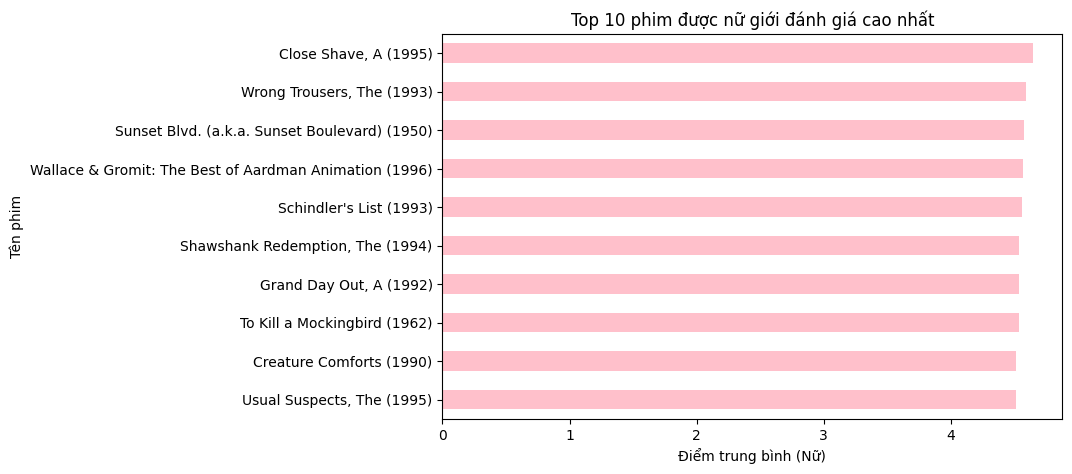

In [29]:
top_female_ratings.head(10)['F'].plot(kind='barh', color='pink', figsize=(8,5))
plt.title('Top 10 phim được nữ giới đánh giá cao nhất')
plt.xlabel('Điểm trung bình (Nữ)')
plt.ylabel('Tên phim')
plt.gca().invert_yaxis()  # Đảo ngược để phim cao nhất nằm trên
plt.show()


**Nhận xét:**
  + Biểu đồ cho thấy 10 phim được nữ giới đánh giá cao nhất có điểm trung bình rất cao (thường trên 4.0).
  + Các phim này chủ yếu thuộc thể loại tâm lý – tình cảm – lãng mạn, phù hợp với xu hướng thị hiếu của nữ giới trong bộ dữ liệu MovieLens.
  

In [36]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [39]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [35]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


**Đoạn code trên hiện thị đo lường độ chênh lệch trong đánh giá phim giữa nam và nữ, giá trị diff càng cao suy ra độ lệch đánh giá của nam và nữ càng cao.**

***Câu hỏi 2:*** Những phim nào được nam giới đánh giá cao vượt trội so với nữ giới? Có thể lý giải sự khác biệt này dựa trên sở thích hoặc đặc điểm nhân khẩu học không?

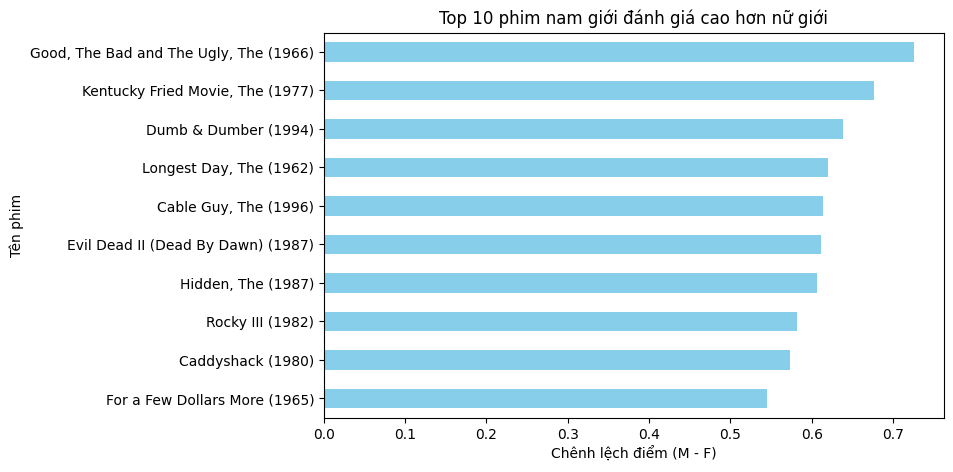

In [40]:
sorted_by_diff[::-1].head(10)['diff'].plot(kind='barh', color='skyblue', figsize=(8,5))
plt.title('Top 10 phim nam giới đánh giá cao hơn nữ giới')
plt.xlabel('Chênh lệch điểm (M - F)')
plt.ylabel('Tên phim')
plt.gca().invert_yaxis()
plt.show()

**Nhận xét:**
  + Biểu đồ cho thấy top 10 phim nam chấm điểm cao hơn nữ thường có độ chênh rõ rệt (từ 0.4 đến 0.8 điểm).
  + Các phim nam yêu thích hơn nữ thường thuộc thể loại hành động, chiến tranh, khoa học viễn tưởng.Những thể loại này thường có nội dung mạnh mẽ, kỹ xảo, xung đột, chiến đấu,nên thu hút đối tượng người xem nam giới nhiều hơn.
  

In [45]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


**Đoạn code trên độ lệch chuẩn (Standard Deviation – std) của điểm đánh giá cho mỗi phim, để biết phim nào có sự đồng thuận cao, và phim nào gây tranh cãi nhiều giữa người xem.**

*   0.3 – 0.5: Đồng thuận cao. Hầu hết người xem đều thích phim này
*   0.6 – 0.9: Có khác biệt nhẹ. Một số người thích, số khác thấy bình thường
*   ≥ 1.0: Gây tranh cãi mạnh. Có người cho 5 sao, có người cho 1 sao



In [42]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


***Câu hỏi 3:*** Có mối liên hệ nào giữa thể loại phim và độ tranh cãi không?? Vì sao các phim này lại gây ra sự khác biệt trong cảm nhận người xem? Điều này có ảnh hưởng gì đến độ lệch chuẩn không

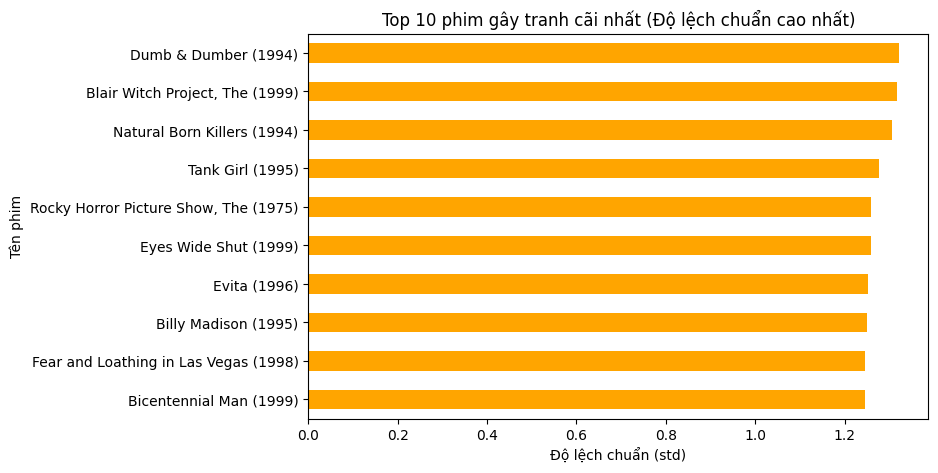

In [46]:
rating_std_by_title.sort_values(ascending=False)[:10].plot(
    kind='barh', color='orange', figsize=(8,5))
plt.title('Top 10 phim gây tranh cãi nhất (Độ lệch chuẩn cao nhất)')
plt.xlabel('Độ lệch chuẩn (std)')
plt.ylabel('Tên phim')
plt.gca().invert_yaxis()
plt.show()

**Nhận xét:**
  + Phần lớn các phim trong danh sách thuộc thể loại tâm lý, nghệ thuật, hoặc siêu thực. Những phim này thường có nội dung phức tạp, nhịp chậm hoặc mang tính ẩn dụ, nên người xem đại chúng có thể thấy nhàm chán, còn người yêu điện ảnh lại đánh giá cao.
  + Điều này khiến cho điểm đánh giá trải rộng làm độ lệch chuẩn tăng.

In [26]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


**Tách cột genres (chứa chuỗi thể loại cách nhau bằng dấu “|”)
thành danh sách các thể loại riêng biệt cho từng bộ phim.**

In [27]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


**Biến mỗi phần tử trong danh sách genre của từng bộ phim thành một dòng riêng biệt trong bảng dữ liệu.**

In [28]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


***Câu hỏi 4:*** Điểm đánh giá có sự thay đổi như thế nào giữa các nhóm tuổi?Có xu hướng gì trong điểm đánh giá theo nhóm tuổi không?

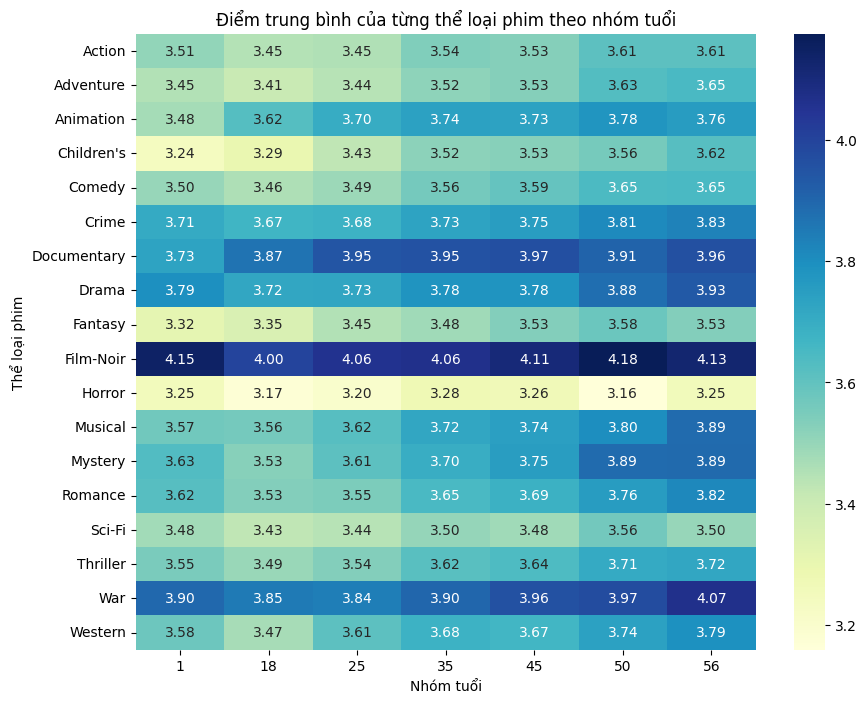

In [49]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(genre_ratings, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Điểm trung bình của từng thể loại phim theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Thể loại phim")
plt.show()

**Nhận xét:**
  + Phần lớn các phim trong danh sách thuộc thể loại tâm lý, nghệ thuật, hoặc siêu thực. Những phim này thường có nội dung phức tạp, nhịp chậm hoặc mang tính ẩn dụ, nên người xem đại chúng có thể thấy nhàm chán, còn người yêu điện ảnh lại đánh giá cao.
  + Người trẻ tuổi thường thích các thể loại mang tính giải trí, hoạt hình hoặc đơn giản như Animation, Children's, Musical.
  + Người lớn tuổi thường đánh giá cao các thể loại có chiều sâu nội dung hoặc mang tính hiện thực cao như Documentary, Drama, War.
  + Một số thể loại như Horror có điểm thấp nhất ở mọi độ tuổi, nhưng đặc biệt thấp ở người trẻ (có thể do yếu tố sợ hãi hoặc thiếu chiều sâu nội dung).
  + Điểm trung bình nhìn chung có xu hướng cao hơn ở nhóm tuổi từ 45 trở lên, cho thấy nhóm này có xu hướng đánh giá phim cao hơn hoặc chọn lọc kỹ hơn khi xem.
  

##**5.Tổng kết**

Qua quá trình phân tích bộ dữ liệu MovieLens , ta rút ra được một số kết luận chính như sau::
  + **Sự phân hóa sở thích theo Giới tính:** Nữ giới có xu hướng đánh giá cao các phim tập trung vào cảm xúc, mối quan hệ và sự tinh tế trong kịch bản (ví dụ: Lãng mạn, Bi kịch, Hài kịch Tinh tế). Nam giới có xu hướng đánh giá cao các phim mang tính hành động, quy mô lớn, và thể loại nặng về kỹ xảo hoặc lịch sử (ví dụ: Hành động, Chiến tranh, Khoa học Viễn tưởng).
  + **Sự thay đổi thị hiếu theo Độ tuổi:** Người dùng trẻ tuổi thiên về các thể loại giải trí đơn giản, sống động và giàu trí tưởng tượng (ví dụ: Hoạt hình, Thiếu nhi, Âm nhạc). Người dùng lớn tuổi có xu hướng đánh giá cao các thể loại có chiều sâu nội dung, mang tính hiện thực hoặc có giá trị nghệ thuật cao (ví dụ: Phim Tài liệu, Chính kịch, Chiến tranh).
  + **Xu hướng Đánh giá Phim Nghệ thuật/Kinh điển:** Các phim được xếp hạng cao nhất thường là những tác phẩm kinh điển, siêu thực hoặc mang tính nghệ thuật phức tạp. Những phim này không được lòng đại đa số khán giả (có thể bị xem là nhàm chán hoặc khó hiểu), nhưng lại được nhóm người yêu điện ảnh đánh giá rất cao, làm tăng điểm trung bình tổng thể.